In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [26]:
repository_url = "https://raw.githubusercontent.com/baertsch/FIN-429/main/"
# Revenues (annual frequency)
rev_y = pd.read_excel(repository_url+"DS_REV_USD_Y.xlsx")
# Return index (monthly frequency)
ri_m = pd.read_excel(repository_url+"DS_RI_USD_M.xlsx")
# Return index (annual frequency)
ri_y = pd.read_excel(repository_url+"DS_RI_USD_Y.xlsx")
# Scope 1
scope1 = pd.read_excel(repository_url+"Scope_1.xlsx")
# Scope 2
scope2 = pd.read_excel(repository_url+"Scope_2.xlsx")
# Market capitalization (monthly frequency)
mv_m = pd.read_excel(repository_url+"DS_MV_USD_M.xlsx")
# Market capitalization (annual frequency)
mv_y = pd.read_excel(repository_url+"DS_MV_USD_M.xlsx")


In [27]:
# Filter for European firms
european_countries = ["AT", "BE", "DK", "FI", "FR", "DE", "IE", "IT", "NL", 
                       "NO", "PT", "ES", "SE", "CH", "GB"]
def filter_europe(df, codes):
    df['Country Code']=df['ISIN'].str[:2]
    df = df[df['Country Code'].isin(codes)]
    return df
rev_y = filter_europe(rev_y,european_countries)
ri_m = filter_europe(ri_m,european_countries)
ri_y = filter_europe(ri_y,european_countries)
scope1 = filter_europe(scope1,european_countries)
scope2 = filter_europe(scope2,european_countries)
mv_m = filter_europe(mv_m,european_countries)
mv_y = filter_europe(mv_y,european_countries)


In [28]:
# For missing values between two availables years, we take the value of the previous year
rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
ri_m.iloc[:,2:-1] = ri_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
ri_y.iloc[:,2:-1] = ri_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
scope1.iloc[:,2:-1] = scope1.iloc[:,2:-1].fillna(method='ffill', axis=1)
scope2.iloc[:,2:-1] = scope2.iloc[:,2:-1].fillna(method='ffill', axis=1)
mv_m.iloc[:,2:-1] = mv_m.iloc[:,2:-1].fillna(method='ffill', axis=1)
mv_y.iloc[:,2:-1] = mv_y.iloc[:,2:-1].fillna(method='ffill', axis=1)

/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_14330/4179368342.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_14330/4179368342.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rev_y.iloc[:,2:-1] = rev_y.iloc[:,2:-1].fillna(method='ffill', axis=1)
/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_14330/4179368342.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4              NaN
5         305807.0
6              NaN
7        3234567.0
8        36413

# Question 1
We take all our data, so all european firms
Then for question 2 and onward we take all european firms with carbon data

In [36]:

# Convert column names to datetime
non_date_columns = ['ISIN', 'NAME']
date_columns = ri_m.columns.difference(non_date_columns)
ri_m[date_columns] = ri_m[date_columns].apply(pd.to_datetime, errors='coerce',axis=1)

# Filter columns between 2014 and 2024
years2014_2024 = [col for col in date_columns if pd.to_datetime(col, errors='coerce').year >= 2014 and pd.to_datetime(col, errors='coerce').year <= 2024]

columns_to_keep = ['ISIN', 'NAME'] + years2014_2024

filtered_ri_m = ri_m[columns_to_keep]


# Function to check available years for each row
def check_available_years(row):
    available_years = row.dropna().index.year
    return available_years.nunique()

# Apply the function to each row
available_years_per_row = filtered_ri_m.apply(check_available_years, axis=1)

# Print the available years for each row
#for index, years in available_years_per_row.items():
    #print(f"Row {index} has data available for years: {years.tolist()}")
print(available_years_per_row)

AttributeError: 'Index' object has no attribute 'year'

In [23]:
filtered_ri_m

,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-30,2014-06-30,2014-07-31,2014-08-29,2014-09-30,2014-10-31,...,2024-03-29,2024-04-30,2024-05-31,2024-06-28,2024-07-31,2024-08-30,2024-09-30,2024-10-31,2024-11-29,2024-12-31
4,69.13,63.24,60.10,64.80,68.66,72.96,63.25,64.92,55.76,51.20,...,195.74,198.00,204.56,204.41,205.06,212.47,204.94,192.71,199.63,200.28
5,655.11,739.57,807.04,798.25,781.54,772.79,779.05,745.81,693.20,761.72,...,2035.05,2014.69,1996.86,2090.26,2127.00,2320.32,2185.23,2200.73,2173.39,2114.91
6,117.81,106.90,102.24,96.70,102.77,101.85,87.91,81.96,69.41,68.04,...,75.55,75.24,74.37,70.38,78.90,80.27,80.70,72.48,78.94,82.80
7,471.14,459.40,442.20,433.93,453.67,421.79,336.05,335.54,298.80,331.91,...,770.19,809.93,896.73,868.42,952.89,1003.75,1006.73,1028.82,1003.97,1131.47
8,163.71,182.35,186.11,185.52,182.14,184.22,180.30,176.74,169.85,141.20,...,260.93,268.32,294.09,311.40,300.32,319.06,318.44,268.58,268.82,267.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,1693.20,1888.22,1815.56,2305.17,2097.96,2107.42,2075.11,2120.25,2207.77,2360.09,...,1330.54,1319.25,1411.58,1234.39,1323.56,1433.71,1446.38,1240.35,1110.84,1237.50
1711,2665.47,2756.09,2822.75,2913.60,2963.40,2914.13,3018.27,2945.13,2897.21,2905.29,...,11560.39,12264.59,13149.83,12955.25,12248.54,12519.58,13347.99,11376.34,11068.91,10605.37
1712,99.55,104.97,102.69,97.60,107.41,98.04,89.09,86.23,72.37,70.28,...,89.43,98.95,101.69,92.24,87.78,86.17,89.15,81.25,96.38,98.24
1713,58.84,64.28,62.51,63.80,63.73,63.68,61.89,61.55,57.21,58.09,...,164.51,155.65,174.14,169.81,185.96,193.55,212.39,191.59,186.07,174.23


In [22]:
def compute_returns(df):
    data = df.set_index("ISIN").drop(columns=["Country Code", "NAME"]).T
    returns = data.apply(lambda row: row[row.first_valid_index():].pct_change(), axis=1).T # Apply pct_change starting from the first non-NaN value onward for each row
    return returns

monthly_returns = compute_returns(filtered_ri_m)
monthly_returns

# Compute Annualized Returns and Volatility
def annualized_stats(returns):
    mean_return = np.mean(returns, axis=1) * 12  # Annualized Return
    volatility = np.std(returns, axis=1) * np.sqrt(12)  # Annualized Volatility
    return mean_return, volatility

annualized_return, annualized_volatility = annualized_stats(monthly_returns)

KeyError: "None of ['ISIN'] are in the columns"

In [ ]:
stats_df = pd.DataFrame({
    "Annualized Return": annualized_return,
    "Annualized Volatility": annualized_volatility
})

In [ ]:
# Take a return of 0 for infinite values
stats_df.replace([np.inf, -np.inf], 0, inplace=True)

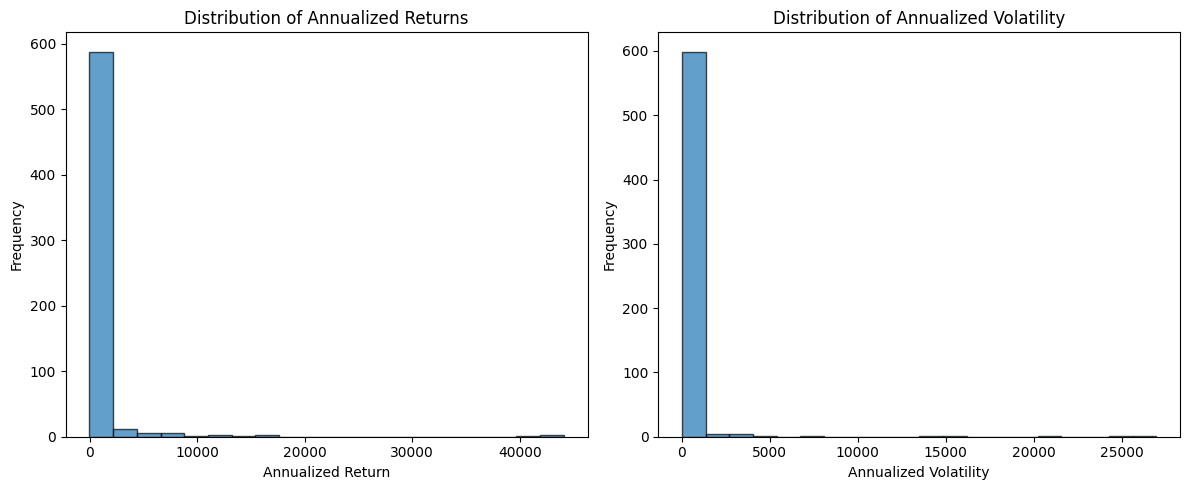

In [ ]:
# Plot Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(stats_df["Annualized Return"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Annualized Return")
plt.ylabel("Frequency")
plt.title("Distribution of Annualized Returns")

plt.subplot(1, 2, 2)
plt.hist(stats_df["Annualized Volatility"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Annualized Volatility")
plt.ylabel("Frequency")
plt.title("Distribution of Annualized Volatility")

plt.tight_layout()
plt.show()